<a href="https://colab.research.google.com/github/RonitGandhi/Hacksprint_PS01_InputOutput/blob/model_branch/NEW_LSTM_CRYPTOCURRENCY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Package Prerequisites**

In [ ]:
pip install yahoofinancials

In [ ]:
pip install yfinance

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import yfinance as yf
from yahoofinancials import YahooFinancials
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 10, 5
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

#**1. Bitcoin Data**

In [ ]:
csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv"

In [ ]:
df_btc = pd.read_csv(csv_path, parse_dates=['Date'])

In [ ]:
df_btc = df_btc.sort_values('Date')

In [ ]:
df_btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42



#**2. Ethereum Data**

In [ ]:
# Ethereum Data
ticker_eth = ['ETH-USD']
df_eth = pd.DataFrame()
temp_df = yf.download(ticker_eth,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_eth = df_eth.append(temp_df)
df_eth = df_eth.reset_index(drop=False)
df_eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100


#**3. Binance Coin Data**

In [ ]:
# Binance Coin Data
ticker_bnb = ['BNB-USD']
df_bnb = pd.DataFrame()
temp_df = yf.download(ticker_bnb,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_bnb = df_bnb.append(temp_df)
df_bnb = df_bnb.reset_index(drop=False)
df_bnb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-25,0.115203,0.115841,0.101531,0.105870,0.105870,145269
1,2017-07-26,0.105893,0.109013,0.099266,0.105138,0.105138,200395
2,2017-07-27,0.105108,0.108479,0.100888,0.107737,0.107737,344499
3,2017-07-28,0.107632,0.109019,0.101473,0.104067,0.104067,342568
4,2017-07-29,0.104782,0.111264,0.101108,0.107811,0.107811,340218


#**4. Cardano Data**

In [ ]:
# Cardano Data
ticker_ada = ['ADA-USD']
df_ada = pd.DataFrame()
temp_df = yf.download(ticker_ada,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_ada = df_ada.append(temp_df)
df_ada = df_ada.reset_index(drop=False)
df_ada.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510


#**5. Tether Data**

In [ ]:
# Tether Data
ticker_usdt = ['USDT-USD']
df_usdt = pd.DataFrame()
temp_df = yf.download(ticker_usdt,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_usdt = df_usdt.append(temp_df)
df_usdt = df_usdt.reset_index(drop=False)
df_usdt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-25,1.210160,1.215490,1.209580,1.211100,1.211100,6
1,2015-02-26,1.210420,1.212320,1.194710,1.205740,1.205740,6
2,2015-03-02,0.571249,0.607890,0.568314,0.606502,0.606502,3
3,2015-03-03,0.605129,0.606229,0.604416,0.606229,0.606229,3
4,2015-03-06,1.000000,1.000000,1.000000,1.000000,1.000000,93


#**6. XRP Data**

In [ ]:
# XRP Data
ticker_xrp = ['XRP-USD']
df_xrp = pd.DataFrame()
temp_df = yf.download(ticker_xrp,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_xrp = df_xrp.append(temp_df)
df_xrp = df_xrp.reset_index(drop=False)
df_xrp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.005123,0.005803,0.005123,0.005399,0.005399,1281960
1,2014-09-18,0.005398,0.005521,0.005091,0.005135,0.005135,491147
2,2014-09-19,0.005134,0.005167,0.004873,0.004942,0.004942,407109
3,2014-09-20,0.004942,0.004954,0.004736,0.004772,0.004772,322621
4,2014-09-21,0.004768,0.004791,0.004540,0.004570,0.004570,309571


#**7. Solana Data**

In [ ]:
# Solana Data
ticker_sol1 = ['SOL1-USD']
df_sol1 = pd.DataFrame()
temp_df = yf.download(ticker_sol1,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_sol1 = df_sol1.append(temp_df)
df_sol1 = df_sol1.reset_index(drop=False)
df_sol1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
1,2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2,2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
3,2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
4,2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614


#**8. Polkadot Data**

In [ ]:
# Polkadot Data
ticker_pol = ['DOT1-USD']
df_pol = pd.DataFrame()
temp_df = yf.download(ticker_pol,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_pol = df_pol.append(temp_df)
df_pol = df_pol.reset_index(drop=False)
df_pol.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-20,2.787857,3.077784,2.692896,2.900080,2.900080,48819867
1,2020-08-21,2.896923,3.090093,2.730919,2.875028,2.875028,49313137
2,2020-08-22,2.878570,4.510613,2.816762,4.484690,4.484690,485801096
3,2020-08-23,4.487058,4.487058,3.716271,3.967066,3.967066,320749483
4,2020-08-24,3.987413,4.783158,3.812670,4.602614,4.602614,407690171


#**9. USD Coin Data**

In [ ]:
# USD Coin Data
ticker_usd = ['USDC-USD']
df_usd = pd.DataFrame()
temp_df = yf.download(ticker_usd,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_usd = df_usd.append(temp_df)
df_usd = df_usd.reset_index(drop=False)
df_usd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-08,1.00410,1.00768,1.00190,1.00221,1.00221,382900
1,2018-10-09,1.00427,1.00833,1.00003,1.00686,1.00686,108803
2,2018-10-10,1.00494,1.01908,1.00397,1.00962,1.00962,711783
3,2018-10-11,1.00994,1.03123,1.00173,1.00978,1.00978,4177290
4,2018-10-12,1.00861,1.01871,1.00114,1.01272,1.01272,1322240


#**10. Doge Coin Data**

In [ ]:
# Doge Coin Data
ticker_doge = ['DOGE-USD']
df_doge = pd.DataFrame()
temp_df = yf.download(ticker_doge,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_doge = df_doge.append(temp_df)
df_doge = df_doge.reset_index(drop=False)
df_doge.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140


#**1. Bitcoin Historic Data**

Text(0, 0.5, 'Close Price (USD)')

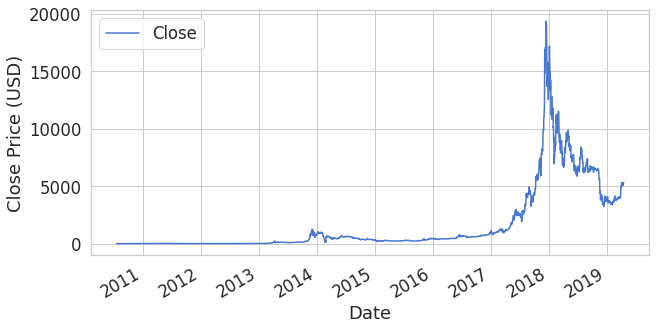

In [ ]:
ax = df_btc.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**2. Ethereum Historic Data**

Text(0, 0.5, 'Close Price (USD)')

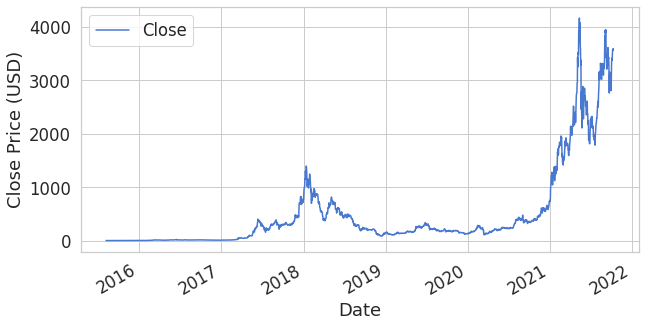

In [ ]:
ax = df_eth.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**3. Binance Coin Historic Data**

Text(0, 0.5, 'Close Price (USD)')

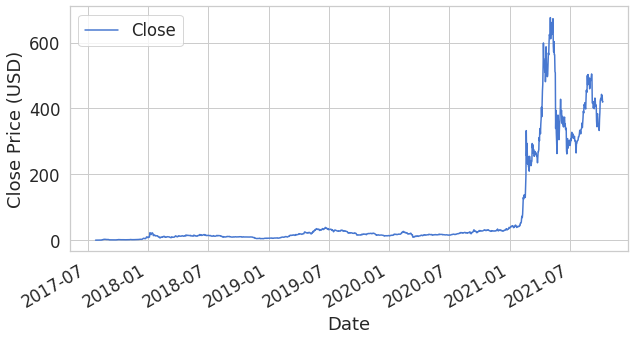

In [ ]:
ax = df_bnb.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**4. Cardano Historic Data**

Text(0, 0.5, 'Close Price (USD)')

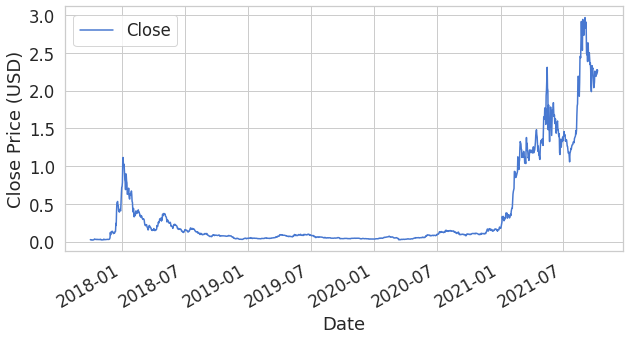

In [ ]:
ax = df_ada.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**5. Tether Historic Data**

Text(0, 0.5, 'Close Price (USD)')

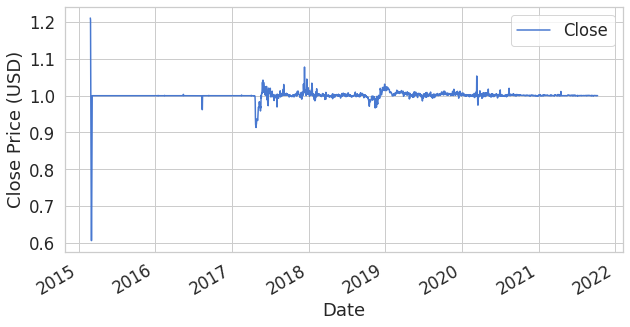

In [ ]:
ax = df_usdt.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**6. XRP Historic Data**

Text(0, 0.5, 'Close Price (USD)')

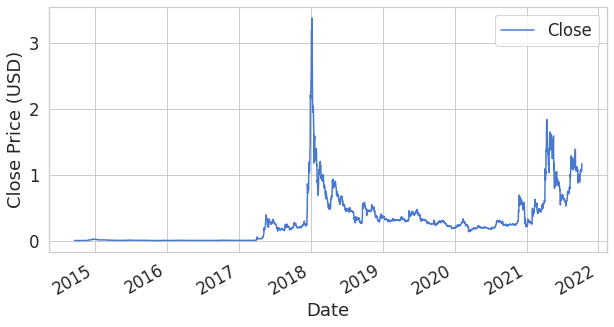

In [ ]:
ax = df_xrp.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**7. Solana Historic Data**

Text(0, 0.5, 'Close Price (USD)')

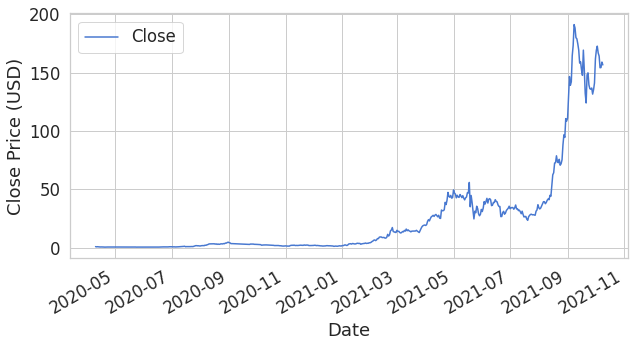

In [ ]:
ax = df_sol1.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**8. Polkadot Historic Data**

Text(0, 0.5, 'Close Price (USD)')

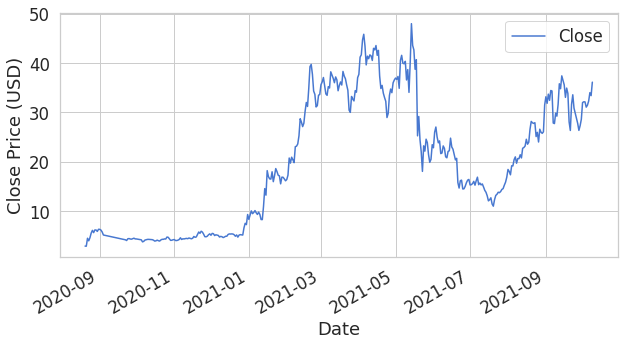

In [ ]:
ax = df_pol.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**9. USD Coin Historic Data**

Text(0, 0.5, 'Close Price (USD)')

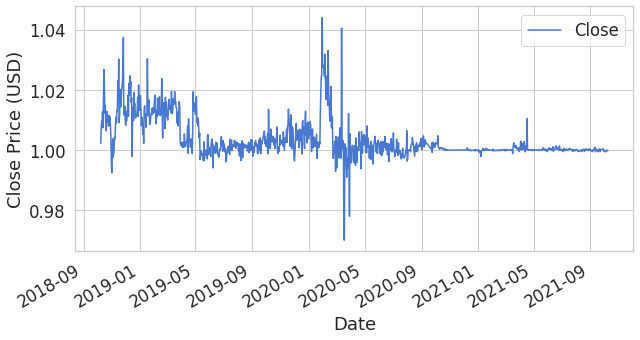

In [ ]:
ax = df_usd.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**10. Doge Coin Historic Data**

Text(0, 0.5, 'Close Price (USD)')

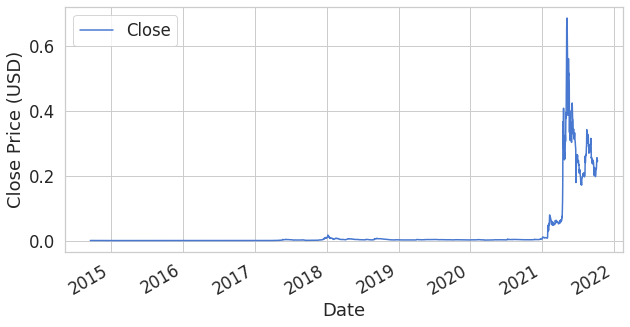

In [ ]:
ax = df_doge.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**1. Bitcoin Training**

**MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()
close_price = df_btc.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape)
print(np.isnan(scaled_close).any())
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
print(np.isnan(scaled_close).any())

(3201, 1)
False
False


**Training & Test Split**

In [ ]:
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [ ]:
X_train.shape

(2945, 99, 1)

In [ ]:
X_test.shape

(156, 99, 1)

**Model Initialization**

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
model = keras.Sequential()
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
BATCH_SIZE = 32
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
83/83 [==============================] - 15s 74ms/step - loss: 0.0016 - val_loss: 0.0696
Epoch 2/50
83/83 [==============================] - 4s 48ms/step - loss: 0.0012 - val_loss: 0.0372
Epoch 3/50
83/83 [==============================] - 4s 48ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 4/50
83/83 [==============================] - 4s 48ms/step - loss: 8.1187e-04 - val_loss: 0.0034
Epoch 5/50
83/83 [==============================] - 4s 48ms/step - loss: 0.0032 - val_loss: 0.0763
Epoch 6/50
83/83 [==============================] - 4s 48ms/step - loss: 0.0077 - val_loss: 0.0349
Epoch 7/50
83/83 [==============================] - 4s 48ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 8/50
83/83 [==============================] - 4s 47ms/step - loss: 0.0050 - val_loss: 0.0042
Epoch 9/50
83/83 [==============================] - 4s 47ms/step - loss: 0.0021 - val_loss: 0.0285
Epoch 10/50
83/83 [==============================] - 4s 48ms/step - loss: 0.0032 - val_loss: 0.0045
Epoc

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7ffb626c1830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 21ms/step - loss: 0.0294


0.029436973854899406

**Loss Plot**

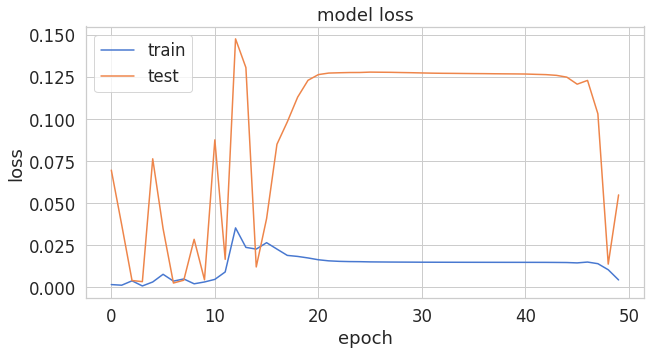

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation**

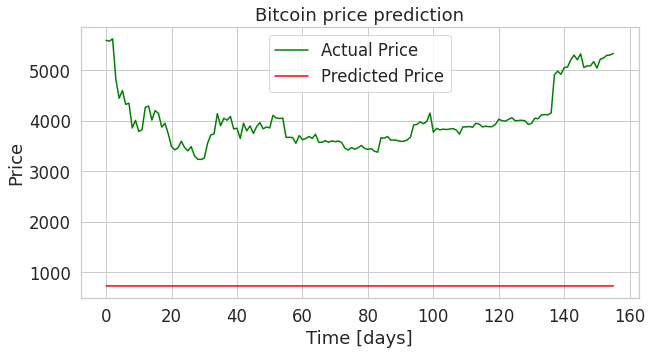

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
model.save('Bitcoin.h5')

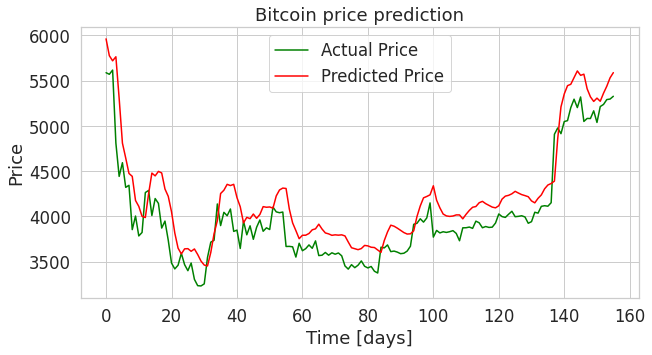

In [ ]:
btc = tf.keras.models.load_model('Bitcoin.h5')
y_hat = btc.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

#**2. Ethereum Training**

**MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()
close_price = df_eth.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape)
print(np.isnan(scaled_close).any())
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
print(np.isnan(scaled_close).any())

(2252, 1)
False
False


**Training & Test Split**

In [ ]:
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.9)

In [ ]:
X_train.shape

(1936, 99, 1)

In [ ]:
X_test.shape

(216, 99, 1)

**Model Initialization**

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
model = keras.Sequential()
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
BATCH_SIZE = 128
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.2
)

Epoch 1/50
13/13 [==============================] - 1s 81ms/step - loss: 2.5922e-04 - val_loss: 3.0333e-04
Epoch 2/50
13/13 [==============================] - 1s 76ms/step - loss: 2.1386e-04 - val_loss: 2.2523e-04
Epoch 3/50
13/13 [==============================] - 1s 78ms/step - loss: 1.1374e-04 - val_loss: 2.2908e-04
Epoch 4/50
13/13 [==============================] - 1s 76ms/step - loss: 9.0729e-05 - val_loss: 1.9205e-04
Epoch 5/50
13/13 [==============================] - 1s 76ms/step - loss: 8.0349e-05 - val_loss: 1.7294e-04
Epoch 6/50
13/13 [==============================] - 1s 77ms/step - loss: 6.4418e-05 - val_loss: 1.6774e-04
Epoch 7/50
13/13 [==============================] - 1s 77ms/step - loss: 5.9689e-05 - val_loss: 1.7159e-04
Epoch 8/50
13/13 [==============================] - 1s 77ms/step - loss: 5.7869e-05 - val_loss: 1.5904e-04
Epoch 9/50
13/13 [==============================] - 1s 78ms/step - loss: 5.6046e-05 - val_loss: 1.5811e-04
Epoch 10/50
13/13 [==================

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 18ms/step - loss: 0.0028


0.002761622192338109

**Loss Plot**

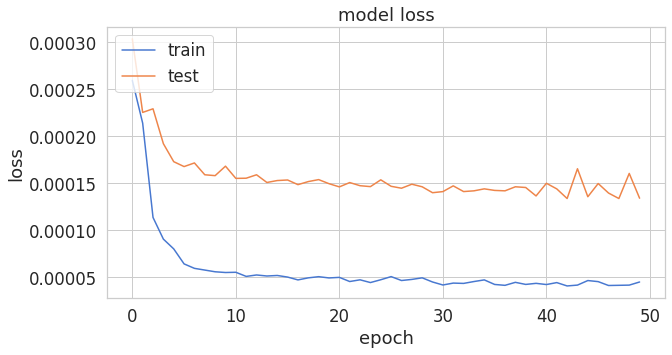

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation**

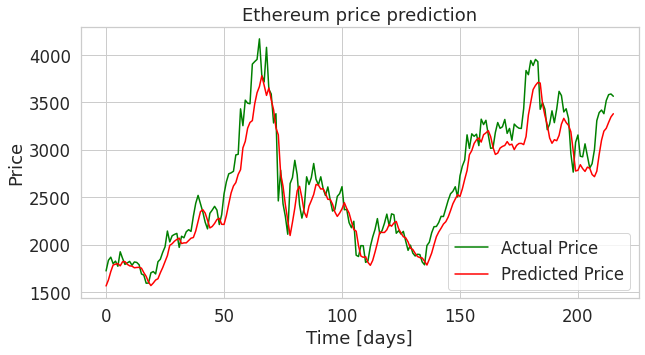

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Ethereum price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
model.save('Ethereum.h5')

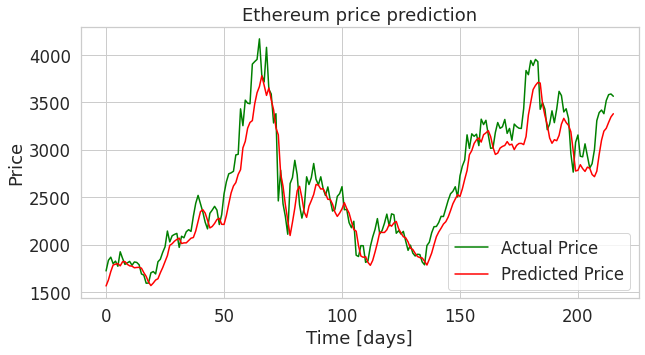

In [ ]:
eth = tf.keras.models.load_model('Ethereum.h5')
y_hat = eth.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Ethereum price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

#**3. Cardano Training**

**MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()
close_price = df_ada.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape)
print(np.isnan(scaled_close).any())
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
print(np.isnan(scaled_close).any())

(1466, 1)
False
False


**Training & Test Split**

In [ ]:
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [ ]:
X_train.shape

(1297, 99, 1)

In [ ]:
X_test.shape

(69, 99, 1)

**Model Initialization**

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
model = keras.Sequential()
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
BATCH_SIZE = 32
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
37/37 [==============================] - 10s 86ms/step - loss: 0.0033 - val_loss: 0.0470
Epoch 2/50
37/37 [==============================] - 2s 43ms/step - loss: 0.0018 - val_loss: 0.0070
Epoch 3/50
37/37 [==============================] - 2s 43ms/step - loss: 8.9813e-04 - val_loss: 0.0045
Epoch 4/50
37/37 [==============================] - 2s 43ms/step - loss: 0.0022 - val_loss: 0.0482
Epoch 5/50
37/37 [==============================] - 2s 43ms/step - loss: 0.0013 - val_loss: 0.0461
Epoch 6/50
37/37 [==============================] - 2s 43ms/step - loss: 0.0049 - val_loss: 0.0861
Epoch 7/50
37/37 [==============================] - 2s 44ms/step - loss: 0.0033 - val_loss: 0.0063
Epoch 8/50
37/37 [==============================] - 2s 43ms/step - loss: 7.8926e-04 - val_loss: 0.0272
Epoch 9/50
37/37 [==============================] - 2s 43ms/step - loss: 0.0033 - val_loss: 0.0935
Epoch 10/50
37/37 [==============================] - 2s 44ms/step - loss: 0.0019 - val_loss: 0.0119


In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 15ms/step - loss: 0.1077


0.10771196335554123

**Loss Plot**

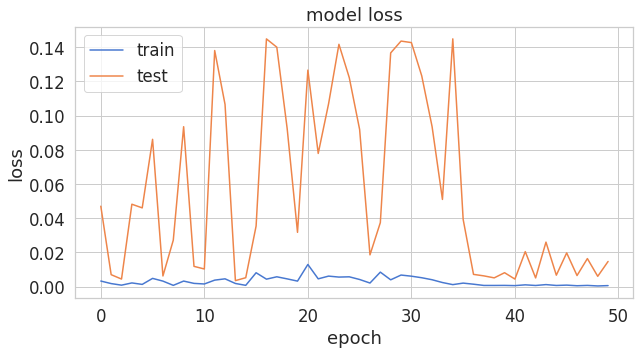

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation**

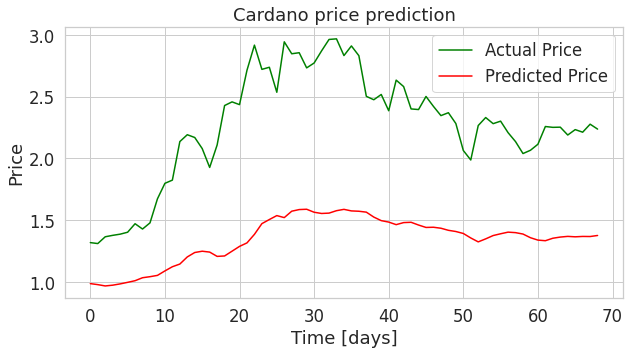

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Cardano price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
model.save('Cardano.h5')

#**4. Binance Training**

**MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()
close_price = df_bnb.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape)
print(np.isnan(scaled_close).any())
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
print(np.isnan(scaled_close).any())

(1534, 1)
False
False


**Training & Test Split**

In [ ]:
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [ ]:
X_train.shape

(1362, 99, 1)

In [ ]:
X_test.shape

(72, 99, 1)

**Model Initialization**

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
model = keras.Sequential()
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
BATCH_SIZE = 32
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
39/39 [==============================] - 10s 89ms/step - loss: 0.0016 - val_loss: 0.0232
Epoch 2/50
39/39 [==============================] - 2s 43ms/step - loss: 0.0023 - val_loss: 0.0086
Epoch 3/50
39/39 [==============================] - 2s 43ms/step - loss: 7.8829e-04 - val_loss: 0.0065
Epoch 4/50
39/39 [==============================] - 2s 43ms/step - loss: 0.0025 - val_loss: 0.4972
Epoch 5/50
39/39 [==============================] - 2s 43ms/step - loss: 0.0043 - val_loss: 0.1638
Epoch 6/50
39/39 [==============================] - 2s 43ms/step - loss: 0.0037 - val_loss: 0.0298
Epoch 7/50
39/39 [==============================] - 2s 43ms/step - loss: 0.0020 - val_loss: 0.0114
Epoch 8/50
39/39 [==============================] - 2s 43ms/step - loss: 0.0020 - val_loss: 0.1964
Epoch 9/50
39/39 [==============================] - 2s 43ms/step - loss: 9.3653e-04 - val_loss: 0.0265
Epoch 10/50
39/39 [==============================] - 2s 43ms/step - loss: 4.7274e-04 - val_loss: 0.0

In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 14ms/step - loss: 0.0581


0.05807885900139809

**Loss Plot**

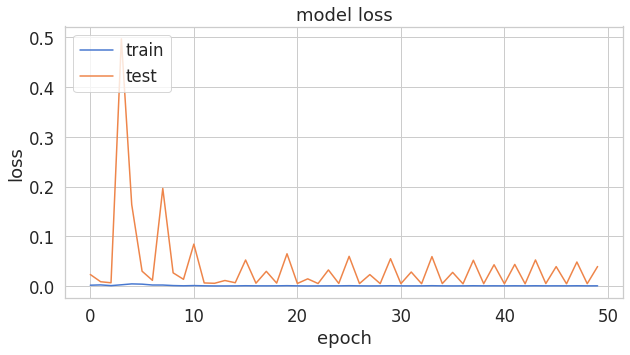

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation**

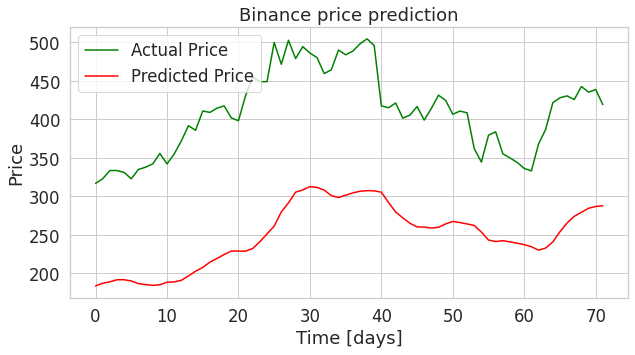

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Binance price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
model.save('Binance.h5')

#**5. Tether Training**

**MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()
close_price = df_usdt.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape)
print(np.isnan(scaled_close).any())
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
print(np.isnan(scaled_close).any())

(2403, 1)
False
False


**Training & Test Split**

In [ ]:
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.9)

In [ ]:
X_train.shape

(2072, 99, 1)

In [ ]:
X_test.shape

(231, 99, 1)

**Model Initialization**

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
model = keras.Sequential()
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
BATCH_SIZE = 128
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
15/15 [==============================] - 1s 77ms/step - loss: 2.2634e-04 - val_loss: 9.8500e-06
Epoch 2/50
15/15 [==============================] - 1s 73ms/step - loss: 2.1986e-04 - val_loss: 1.0078e-05
Epoch 3/50
15/15 [==============================] - 1s 74ms/step - loss: 2.3298e-04 - val_loss: 1.2672e-05
Epoch 4/50
15/15 [==============================] - 1s 73ms/step - loss: 2.3512e-04 - val_loss: 1.6423e-05
Epoch 5/50
15/15 [==============================] - 1s 74ms/step - loss: 2.2946e-04 - val_loss: 1.3184e-05
Epoch 6/50
15/15 [==============================] - 1s 73ms/step - loss: 2.2504e-04 - val_loss: 9.8106e-06
Epoch 7/50
15/15 [==============================] - 1s 75ms/step - loss: 2.2782e-04 - val_loss: 9.8061e-06
Epoch 8/50
15/15 [==============================] - 1s 74ms/step - loss: 2.4243e-04 - val_loss: 2.8007e-05
Epoch 9/50
15/15 [==============================] - 1s 75ms/step - loss: 2.3928e-04 - val_loss: 1.6677e-05
Epoch 10/50
15/15 [==================

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 21ms/step - loss: 3.6439e-06


3.643859145086026e-06

**Loss Plot**

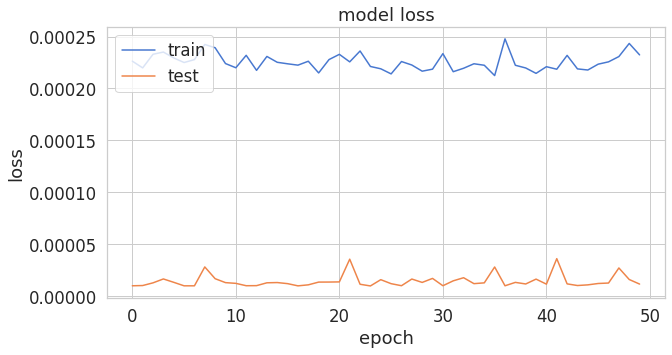

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation**

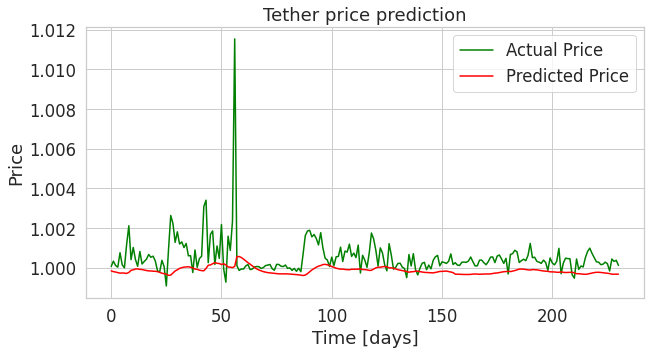

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Tether price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
model.save('Tether.h5')

#**6. XRP Training**

**MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()
close_price = df_xrp.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape)
print(np.isnan(scaled_close).any())
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
print(np.isnan(scaled_close).any())

(2576, 1)
False
False


**Training & Test Split**

In [ ]:
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [ ]:
X_train.shape

(2352, 99, 1)

In [ ]:
X_test.shape

(124, 99, 1)

**Model Initialization**

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
model = keras.Sequential()
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
BATCH_SIZE = 32
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
67/67 [==============================] - 11s 66ms/step - loss: 0.0044 - val_loss: 0.0223
Epoch 2/50
67/67 [==============================] - 3s 43ms/step - loss: 0.0032 - val_loss: 0.0132
Epoch 3/50
67/67 [==============================] - 3s 43ms/step - loss: 0.0029 - val_loss: 0.0067
Epoch 4/50
67/67 [==============================] - 3s 43ms/step - loss: 0.0028 - val_loss: 0.0043
Epoch 5/50
67/67 [==============================] - 3s 43ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 6/50
67/67 [==============================] - 3s 43ms/step - loss: 0.0017 - val_loss: 0.0201
Epoch 7/50
67/67 [==============================] - 3s 43ms/step - loss: 0.0044 - val_loss: 0.0072
Epoch 8/50
67/67 [==============================] - 3s 43ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 9/50
67/67 [==============================] - 3s 43ms/step - loss: 0.0015 - val_loss: 0.0217
Epoch 10/50
67/67 [==============================] - 3s 43ms/step - loss: 0.0044 - val_loss: 0.0079
Epoch 11

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 16ms/step - loss: 0.0090


0.009042421355843544

**Loss Plot**

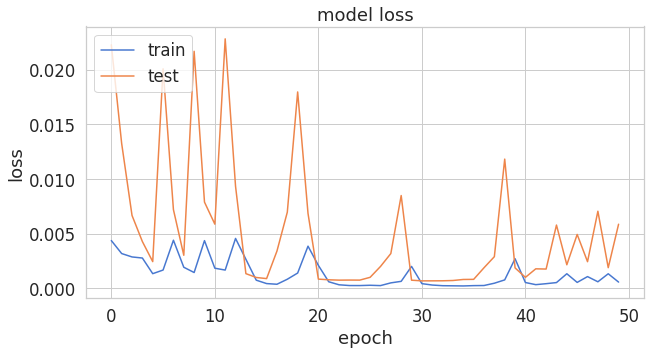

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation**

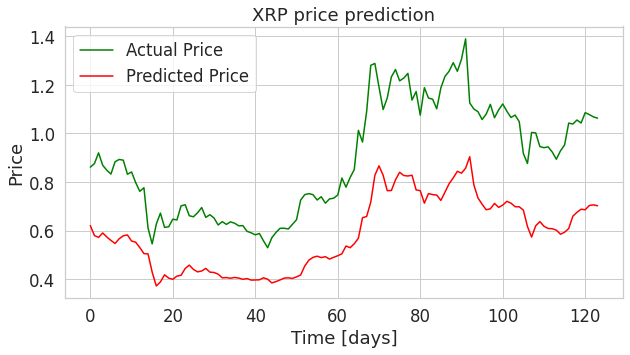

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('XRP price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
model.save('XRP.h5')

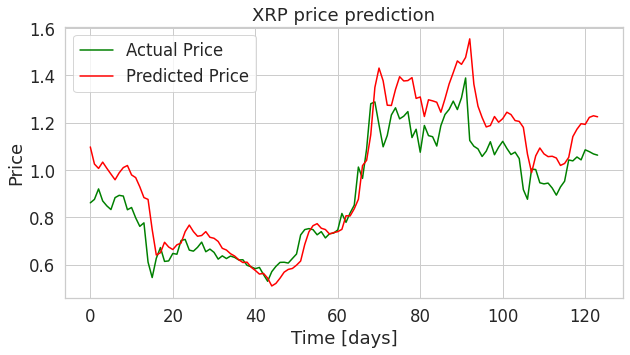

In [ ]:
xrp = tf.keras.models.load_model('XRP.h5')
y_hat = xrp.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('XRP price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

#**7. Solana Training**

**MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()
close_price = df_sol1.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape)
print(np.isnan(scaled_close).any())
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
print(np.isnan(scaled_close).any())

(520, 1)
False
False


**Training & Test Split**

In [ ]:
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [ ]:
X_train.shape

(399, 99, 1)

In [ ]:
X_test.shape

(21, 99, 1)

**Model Initialization**

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
model = keras.Sequential()
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
BATCH_SIZE = 1
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
359/359 [==============================] - 13s 26ms/step - loss: 2.9735e-04 - val_loss: 0.0784
Epoch 2/50
359/359 [==============================] - 9s 26ms/step - loss: 5.4545e-04 - val_loss: 0.0933
Epoch 3/50
359/359 [==============================] - 9s 26ms/step - loss: 8.1181e-04 - val_loss: 0.0946
Epoch 4/50
309/359 [========================>.....] - ETA: 1s - loss: 9.1300e-04

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 47ms/step - loss: 0.0440


0.04399416595697403

**Loss Plot**

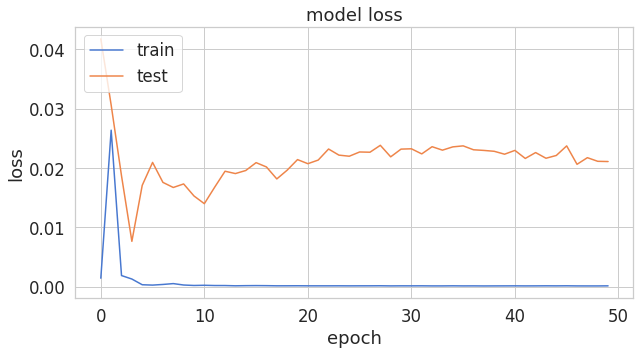

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation**

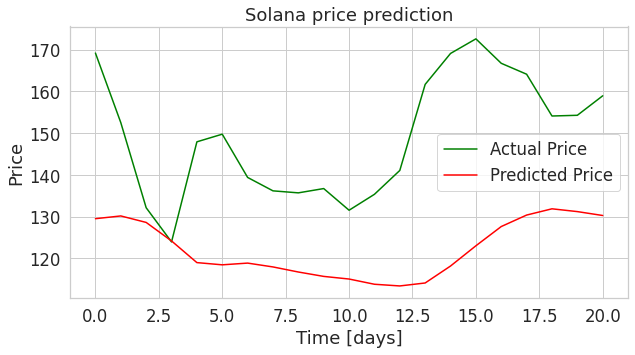

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Solana price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
model.save('Solana.h5')

#**8. Polkadot Training**

**MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()
close_price = df_pol.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape)
print(np.isnan(scaled_close).any())
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
print(np.isnan(scaled_close).any())

(393, 1)
False
False


**Training & Test Split**

In [ ]:
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [ ]:
X_train.shape

(278, 99, 1)

In [ ]:
X_test.shape

(15, 99, 1)

**Model Initialization**

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
model = keras.Sequential()
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
BATCH_SIZE = 32
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
8/8 [==============================] - 9s 293ms/step - loss: 0.1613 - val_loss: 0.3008
Epoch 2/50
8/8 [==============================] - 0s 45ms/step - loss: 0.1680 - val_loss: 0.0223
Epoch 3/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0740 - val_loss: 0.0722
Epoch 4/50
8/8 [==============================] - 0s 45ms/step - loss: 0.1034 - val_loss: 0.0959
Epoch 5/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0431 - val_loss: 0.0052
Epoch 6/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0224 - val_loss: 0.0064
Epoch 7/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0152 - val_loss: 0.0160
Epoch 8/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0086 - val_loss: 0.0059
Epoch 9/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0104 - val_loss: 0.0098
Epoch 10/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0080 - val_loss: 0.0084
Epoch 11/50
8/8 [===========

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.0028


0.0027646305970847607

**Loss Plot**

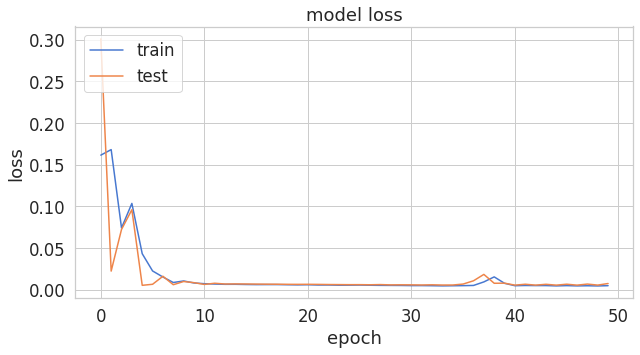

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation**

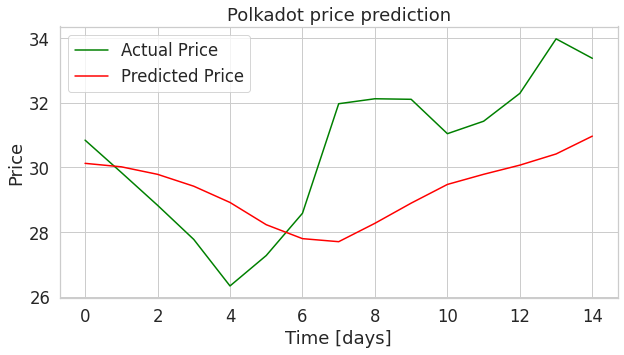

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Polkadot price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
model.save('Polkadot.h5')

#**9. USD Training**

**MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()
close_price = df_usd.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape)
print(np.isnan(scaled_close).any())
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
print(np.isnan(scaled_close).any())

(1036, 1)
False
False


**Training & Test Split**

In [ ]:
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [ ]:
X_train.shape

(889, 99, 1)

In [ ]:
X_test.shape

(47, 99, 1)

**Model Initialization**

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
model = keras.Sequential()
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
BATCH_SIZE = 32
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
25/25 [==============================] - 9s 138ms/step - loss: 0.0457 - val_loss: 0.0042
Epoch 2/50
25/25 [==============================] - 1s 45ms/step - loss: 0.0071 - val_loss: 3.9407e-05
Epoch 3/50
25/25 [==============================] - 1s 46ms/step - loss: 0.0055 - val_loss: 1.7918e-04
Epoch 4/50
25/25 [==============================] - 1s 46ms/step - loss: 0.0053 - val_loss: 1.9133e-04
Epoch 5/50
25/25 [==============================] - 1s 45ms/step - loss: 0.0053 - val_loss: 3.1151e-04
Epoch 6/50
25/25 [==============================] - 1s 46ms/step - loss: 0.0051 - val_loss: 2.4294e-04
Epoch 7/50
25/25 [==============================] - 1s 45ms/step - loss: 0.0047 - val_loss: 2.5837e-04
Epoch 8/50
25/25 [==============================] - 1s 45ms/step - loss: 0.0046 - val_loss: 2.2807e-04
Epoch 9/50
25/25 [==============================] - 1s 45ms/step - loss: 0.0046 - val_loss: 2.2590e-04
Epoch 10/50
25/25 [==============================] - 1s 45ms/step - loss: 0.

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 15ms/step - loss: 7.2634e-05


7.263384759426117e-05

**Loss Plot**

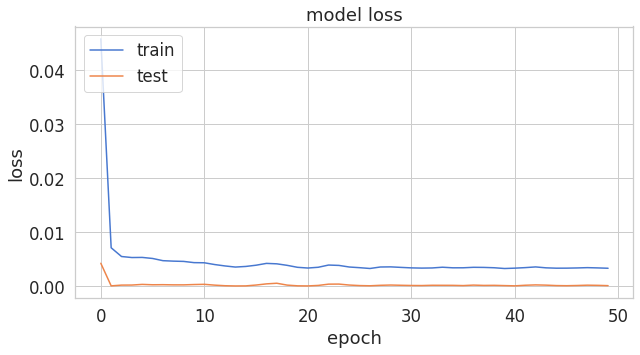

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation**

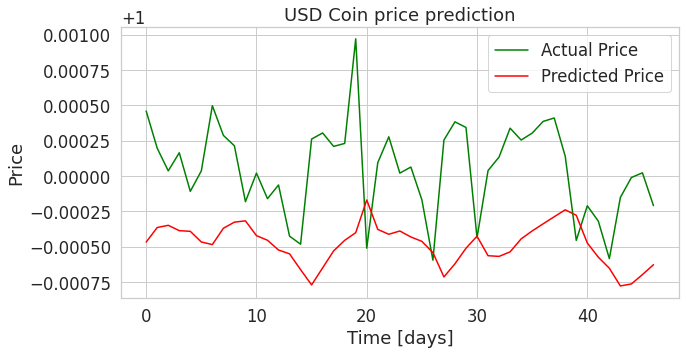

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('USD Coin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
model.save('USD.h5')

#**10. Dogecoin Training**

**MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()
close_price = df_doge.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape)
print(np.isnan(scaled_close).any())
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
print(np.isnan(scaled_close).any())

(2576, 1)
False
False


**Training & Test Split**

In [ ]:
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.8)

In [ ]:
X_train.shape

(1980, 99, 1)

In [ ]:
X_test.shape

(496, 99, 1)

**Model Initialization**

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
model = keras.Sequential()
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
BATCH_SIZE = 128
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.2
)

Epoch 1/50
13/13 [==============================] - 1s 82ms/step - loss: 1.7050e-05 - val_loss: 2.0505e-05
Epoch 2/50
13/13 [==============================] - 1s 77ms/step - loss: 2.9723e-05 - val_loss: 2.7250e-07
Epoch 3/50
13/13 [==============================] - 1s 78ms/step - loss: 1.4987e-05 - val_loss: 1.9678e-07
Epoch 4/50
13/13 [==============================] - 1s 78ms/step - loss: 1.1384e-05 - val_loss: 8.9847e-07
Epoch 5/50
13/13 [==============================] - 1s 78ms/step - loss: 1.1703e-05 - val_loss: 1.4649e-06
Epoch 6/50
13/13 [==============================] - 1s 78ms/step - loss: 1.1478e-05 - val_loss: 1.0741e-06
Epoch 7/50
13/13 [==============================] - 1s 77ms/step - loss: 1.0020e-05 - val_loss: 1.3494e-06
Epoch 8/50
13/13 [==============================] - 1s 78ms/step - loss: 8.4878e-06 - val_loss: 3.6632e-06
Epoch 9/50
13/13 [==============================] - 1s 77ms/step - loss: 8.1918e-06 - val_loss: 5.5343e-06
Epoch 10/50
13/13 [==================

In [ ]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 19ms/step - loss: 0.0060


0.005963487084954977

**Loss Plot**

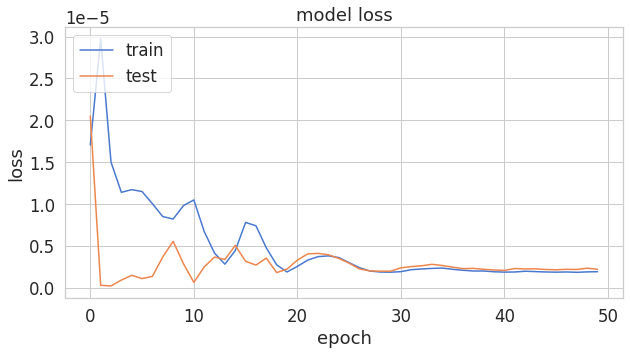

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluation**

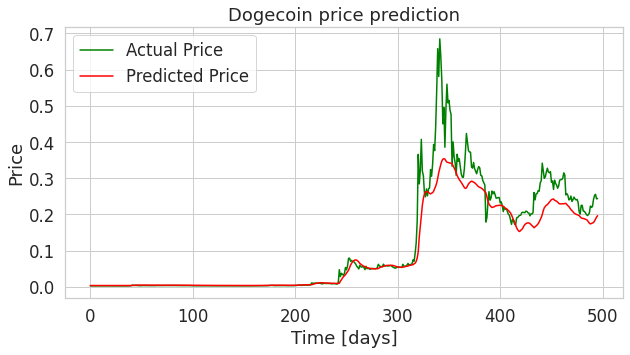

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Dogecoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
model.save('Dogecoin.h5')

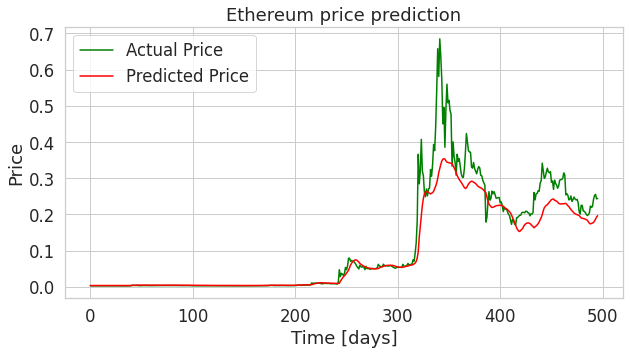

In [ ]:
dog = tf.keras.models.load_model('Dogecoin.h5')
y_hat = dog.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Ethereum price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();